# Task 4.10 Part 1: Instacart Grocery Basket Analysis - Answering Key Business Questions

## Table of Contents
#### Section 1: Data Transformations
##### Importing Data
##### Addressing PII Data and Security Risks
##### Regional Segmentation (by state) of Data 
##### Differences in Regional Spending
##### Flagging Customers by Activity
#### Section 2: Creating Customer Profiles and Visualizations
##### Top Departments
##### Price Range Groupings
##### Age Profile
##### Family Status Profile
##### Income Profile
##### Loyalty Status Profile
##### Region Profile
##### Busiest Periods of Activity
##### Additional and Alternate Versions of Visualizations of Key Findings

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Step 1 - Importing the merged dataset exported from Exercise 4.9

In [3]:
# Creating a path to project folder. 

path = r'C:\Users\TanaT\(CF) Achievement 4 - Instacart Basket Analysis'

# Importing merged data from 4.9 that contains customers data. 

df =  pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_and_merged.pkl'))  

In [4]:
# Checking dataframe.

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [5]:
# Checking shape of dataframe. 

df.shape

(32404859, 34)

## Step 2 - Addressing Data Security Risks.

Consider any security implications that might exist for this new data. 
Any PII in the data will need to be addressed before continuing the analysis.

In [6]:
# Checking columns for any data that could contain PII and sensitive information. 

df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'ordering_behavior_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'merge_status'],
      dtype='object')

- This dataset contains PII such as first and last names of customers.
- Paired with other sensitive data (age, location, gender), this could pose as a privacy risk.
- Therefore the columns 'first_name' and 'last_name' will be dropped.
- They are not useful to the analysis and user_id can be used to identity customers instead. 

In [7]:
# Dropping columns that contain PII.
# Overwriting the original dataframe, since names will not be used going foward. 

df.drop(columns = ['first_name', 'last_name'], axis = 1, inplace = True)

In [8]:
# Checking that columns were removed. 

df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'ordering_behavior_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge_status'],
      dtype='object')

In [9]:
# Checking shape. 

df.shape

(32404859, 32)

## Preparing Data for Analysis 

#### Importing wrangled departments data to use for customer profiles.

In [10]:
# Importing wrangled departments data as a csv file.

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','departments_wrangled.csv' ), index_col = False)

# Checking dataframe. 
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# Renaming the first column (should be the department id).

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

# Checking updated dataframe.

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
# Connecting the department data with updated dataframe (removed PII columns).  

# Making the department data a dictionary. 

zipped = zip(df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)

# Checking dictionary. 

data_dict


{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [13]:
# Mapping the info to connect department names to 'department_id'. 

# Making new 'department' column to show names of departments. 

df['department'] = df['department_id'].map(data_dict)

# Checking updated dataframe. 

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,ordering_behavior_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks


In [14]:
# Checking shape of updated dataframe with new column. 

df.shape

(32404859, 33)

## Step 3a - Create a regional segmentation of the data. 

- A regional column will be created based on the 'state' column.
- Regions will be based on the divisons outlined in the provided link.
  (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

In [15]:
# Creating a dictionary mapping the states to regions. 

state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}


In [16]:
# Creating a new 'region' column and assigning regions for each state. 

df['region'] = df['state'].map(state_to_region)

# Checking results of mapping. 

df[['state', 'region']]

,state,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest
...,...,...
32404854,Rhode Island,Northeast
32404855,West Virginia,South
32404856,Michigan,Midwest
32404857,Michigan,Midwest


In [17]:
# Checking dataframe with new columns. 

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,both,snacks,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest


In [18]:
# Checking shape of updated dataframe. 

df.shape

(32404859, 34)

## Step 3b - Determine whether there is a difference in spending habits between the different U.S. regions. 

In [19]:
# Creating a crosstab of the 'region' column with the 'spending_flag' column to see how spending differs across the 4 regions. 

crosstab_regional_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

# Checking crosstab.

crosstab_regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [20]:
# Counting the 'spending_flag'.

df['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

- Most customers are considered **low spenders.** 

In [21]:
# Copying crosstab to clipboard to open in Excel

crosstab_regional_spending.to_clipboard()

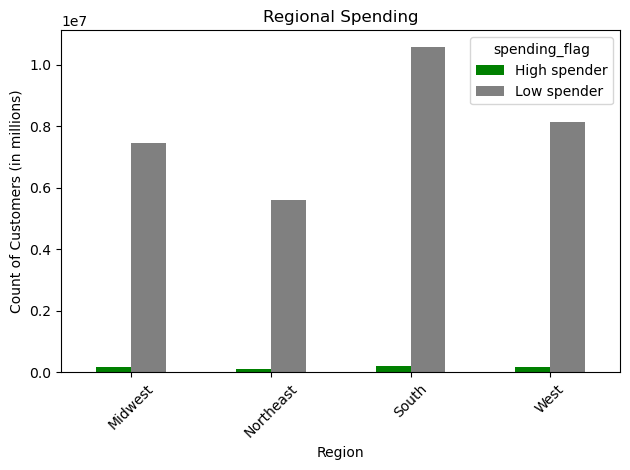

In [22]:
# Creating a bar chart to visualize crosstab. 

bar_reg_spending = crosstab_regional_spending.plot(kind="bar", color = ['green', 'gray'] )

# Title 
plt.title ('Regional Spending')

# Rotating labels for better readability 
plt.xlabel ('Region')
plt.xticks(rotation=45)

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Count of Customers (in millions)')

# Layout
plt.tight_layout()


- When comparing customers in terms of high vs low spending, the bar chart shows that most customers are considered **low spenders** in all of the regions, with a low frequency of high spending customers.
  
- **All of the regions seem to follow this behavior, meaning there is no unique difference in spending habits between the regions.**

In [23]:
# Exporting bar chart. 

bar_reg_spending.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_regional_spending.png'), bbox_inches='tight')

## Step 4 - Create an exclusion flag for low-activity customers. 

Customers with less then 5 orders are considered 'low-activity' and will be excluded from the data. 

In [24]:
# Creating a new exclusion flag column based on the 'max_order' column and the provided conditions. 

df.loc[df['max_order'] < 5, 'customer_activity'] = 'low'
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'high'

In [25]:
# Checking flag count. 

df['customer_activity'].value_counts(dropna = False)

customer_activity
high    30964564
low      1440295
Name: count, dtype: int64

In [26]:
# Creating a new dataframe (subset) of only the low-activity customers.

df_low_act_cust = df[df['customer_activity']=='low']

In [27]:
# Checking the subset. 

df_low_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,Kansas,41,1/7/2018,2,married,122060,both,snacks,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,Kansas,41,1/7/2018,2,married,122060,both,snacks,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,Kansas,41,1/7/2018,2,married,122060,both,snacks,Midwest,low


In [28]:
# Checking shape of subset of low-activity customers. 

df_low_act_cust.shape

(1440295, 35)

### Exporting the subset of low-activity customers.

In [29]:
# Exporting subset.

df_low_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

### Excluding the low-activity customers from the data. 

In [30]:
# Checking dataframe before excluding low-activity customers. 

df.shape

(32404859, 35)

In [31]:
# Making new dataframe with only high-activity customers included.

df_2 = df[df['customer_activity']== 'high']

In [32]:
# Checking shape of updated dataframe. 

df_2.shape

(30964564, 35)

In [33]:
# Checking updated dataframe

df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest,high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest,high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,snacks,Northeast,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,both,snacks,West,high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,snacks,South,high


## Steps 5 and 6 - Creating customer profiles and visualizations.  

Create a profiling variable based on age, income, certain goods in the 'department_id' column, and number of dependents.

### Exporting updated dataframe (only high-activity customers) to use for final analyses. 

In [34]:
# Exporting updated dataframe as a pickle (new department name, regions, and customer activity columns - no PII columns)

df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_cust_and_dept.pkl'))

### Department Data

### Key Question 4 - Are there certain types of products that are more popular than others?

- The marketing team and sales teams want to know which departments have the highest frequency of product orders.

#### Finding the popularity of products. 

In [35]:
# Finding which departments have the highest frequency of orders - which departments are popular. 

df_2['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

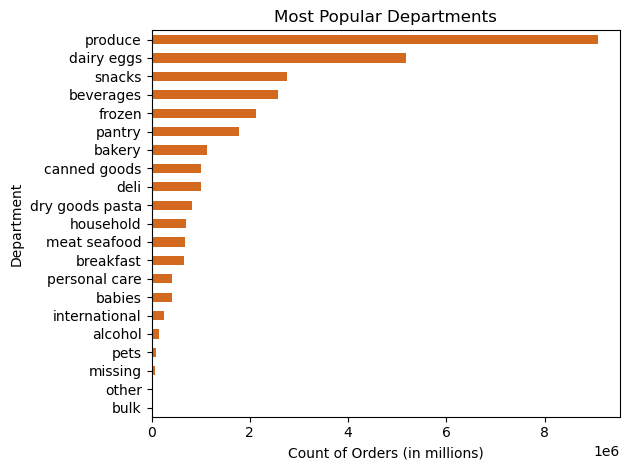

In [38]:
# Bar chart of departments by order count. 

bar_pop_dept = df_2['department'].value_counts().sort_values().plot(kind = 'barh', color = ['chocolate'])

plt.title('Most Popular Departments')
plt.xlabel('Count of Orders (in millions)')
plt.ylabel('Department')

plt.tight_layout()

- **Produce, dairy/eggs, snack, beverages, and frozen** are the top 5 departments with the most orders.
- This suggests that the marketing team should focus promoting departments with fewer orders (pet, alcohol, international,etc.) to increase sales.

In [40]:
# Exporting bar chart. 
bar_pop_dept.figure.savefig(os.path.join(path, '04 Analysis and Results', 'Visualizations', 'bar_pop_dept.png'),bbox_inches='tight')

In [41]:
# Finding specific produce items that are popular. 

# Filtering for produce department only.
df_produce_only = df_2[df_2['department'] == 'produce']

# Checking df with only produce items.

df_produce_only.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity
10881,31,White Pearl Onions,123,4,7.5,2766690,2937,3,1,17,...,Ohio,28,5/25/2018,3,married,88405,both,produce,Midwest,high
10882,31,White Pearl Onions,123,4,7.5,2960023,4582,2,2,21,...,Tennessee,24,8/1/2019,1,married,64749,both,produce,South,high
10883,31,White Pearl Onions,123,4,7.5,987065,4582,13,6,13,...,Tennessee,24,8/1/2019,1,married,64749,both,produce,South,high
10884,31,White Pearl Onions,123,4,7.5,1062850,4705,65,4,13,...,Idaho,65,6/26/2017,0,divorced/widowed,63568,both,produce,West,high
10885,31,White Pearl Onions,123,4,7.5,741886,8662,14,3,4,...,Tennessee,62,3/7/2017,2,married,87777,both,produce,South,high


In [42]:
# Counting products in produce df to find what items are popular. 
# This will show top 10 most purchased produce items. 

top_produce_items = df_produce_only['product_name'].value_counts().head(10)

#### Top 10 Most Popular Produce Items 

In [43]:
# Top 10 produce items.
top_produce_items

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Raspberries       132945
Name: count, dtype: int64

- **Produce is the most popular department (has the most orders)**.
- The top 10 most popular items in produce are listed above.
- This shows that customers are buying these items, therefore marketing should focus promoting other items to increase sales elsewhere. 

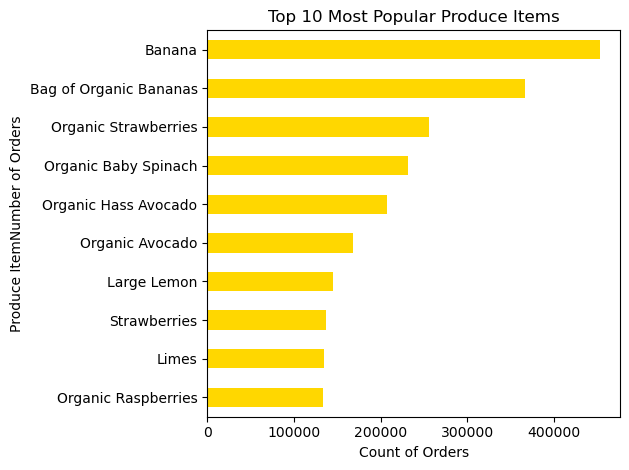

In [45]:
# Visualizing results 

bar_top_produce = top_produce_items.sort_values().plot(kind='barh', color='gold')

plt.title('Top 10 Most Popular Produce Items')
plt.xlabel('Count of Orders')
plt.ylabel('Produce Item''Number of Orders')
plt.tight_layout()


- These are the **top 10 most popular items in the produce department**.
- Among these items, some of the most popular ones are **bananas, strawberries, spinach, avocados, etc.**

In [46]:
# Exporting bar chart. 

bar_top_produce.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_top_produce.png'), bbox_inches='tight')

### Key Question 3 - Price range groupings.

- Instacart has a lot of products with different price tags.
- Marketing and sales want to use simpler price range groupings to help direct their efforts.

#### Products by Price Range Groupings

In [47]:
# Finding distribution of price range groupings. 
df_2['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

- To help marketing and sales use simpler price range groupings, products were categorized as listed above (exercise 4.7).
- The output shows that most products are considered **mid-range (between 5 and 15 dollars)**, followed by low-range, then high-range.
- **Low-range** products are priced as less or equal to 5 dollars.
- **High-range** products are priced as over 15 dollars and are the least prevalent price grouping. 

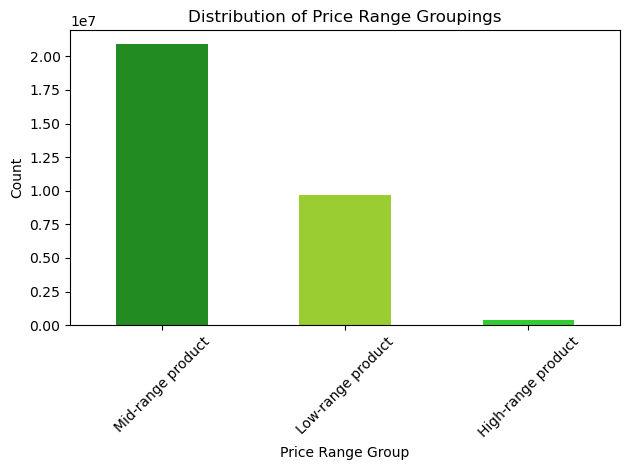

In [50]:
# Bar chart of price range groupings. 
# CHANGE COLORS BASED ON HOW MANY GROUPINGS

bar_price_range = df_2['price_range_loc'].value_counts().plot.bar(color = ['forestgreen', 'yellowgreen', 'limegreen'])
                                                                                 
plt.title('Distribution of Price Range Groupings')
plt.xlabel('Price Range Group')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.tight_layout()

- The bar chart shows that **most items are considered mid-range (between 5-15 dollars).**
- Few products are expensive/considered high-range (over 15 dollars).

In [51]:
# Exporting bar chart

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_price_range_dist.png'), bbox_inches='tight')

#### How Prices Differ Among Products

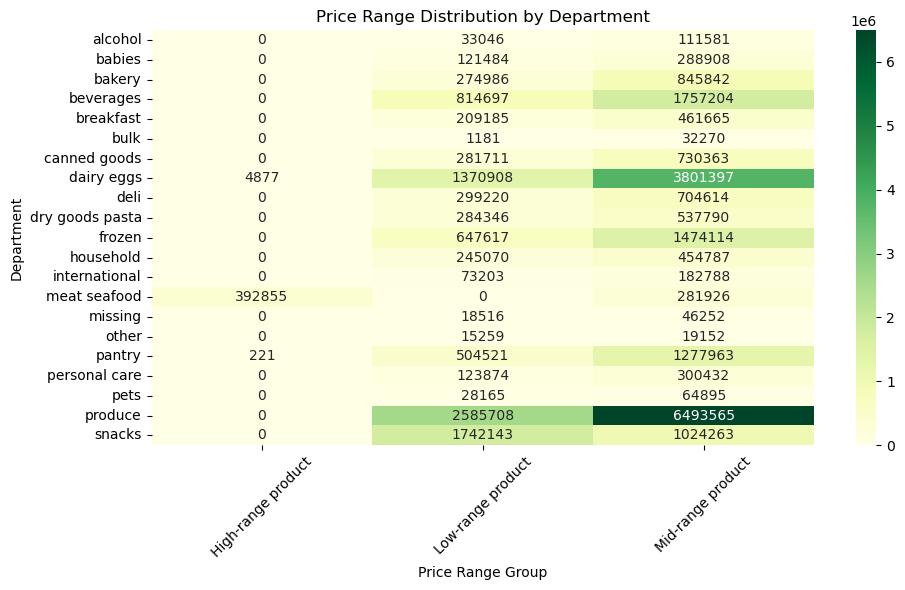

In [57]:
# Heatmap or bar chart of price ranges and products (department) to see how prices differ among products.

# Crosstab

crosstab_price_group_dept = pd.crosstab(df_2['department'], df_2['price_range_loc'])

# Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_price_group_dept, annot=True, fmt='d', cmap='YlGn')

plt.title('Price Range Distribution by Department')
plt.xlabel('Price Range Group')
plt.xticks(rotation=45)
plt.ylabel('Department')
plt.tight_layout()

# Saving figure
plt.savefig(os.path.join(path, '04 Analysis and Results', 'Visualizations', 'heatmap_price_dept.png'), bbox_inches='tight')

- Most products fall into the **low to mid-range price category.**
- Among the many mid-range departments, **produce has the most products priced between 5-15 dollars**, followed by **dairy/eggs** department.
- There are only several expensive departments, with **meat/seafood being the most expensive** with products being priced over 15 dollars.
- This suggests that **customers prefer affordable low to mid-range prices and have low demand for premium goods.**

### Key Question 5 - Customer profiles. 

### Age Profile

In [58]:
# Checking statistics of age column. 

df_2['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

- Average age is around 49
- Min age is 18
- Max age is 81
- **Most customers (50th and 75th percentile) are older (49 and over)**
- Possible age groupings (<= 33 (young), >33 and <=65 (middle-aged), >65 (older)) - based on the quartiles

#### Dividing ages into categories based on quartiles. 

In [59]:
# Grouping ages into categories based on the quartiles. 

# Classifying 'young' adults.
df_2.loc[df_2['age'] <= 33, 'age_category'] = 'Young adult'

# Classifying 'middle-aged' adults.
df_2.loc[(df_2['age'] > 33) & ( df_2 ['age'] < 65), 'age_category'] = 'Middle-aged adult'

# Classifying 'older' adults. 
df_2.loc[df_2['age'] >= 65, 'age_category'] = 'Senior'

C:\Users\TanaT\AppData\Local\Temp\ipykernel_32824\863239599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['age'] <= 33, 'age_category'] = 'Young adult'


In [60]:
# Checking age categories. 

df_2['age_category'].value_counts(dropna = False)

age_category
Middle-aged adult    15011555
Senior                8195544
Young adult           7757465
Name: count, dtype: int64

#### Customer Distribution by Age Groups

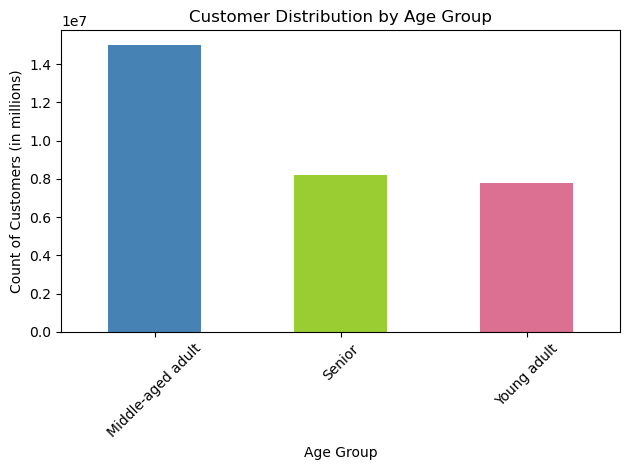

In [62]:
# Visualizing distribution of customers by age groups.  

# Making a bar chart.

bar_cust_age = df_2['age_category'].value_counts().plot(kind = 'bar', color = ['steelblue', 'yellowgreen', 'palevioletred'])

plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Count of Customers (in millions)')
plt.tight_layout()

- **Most customers are middle-aged (over 33).**
- Young adults account for the smallest portion of customers, but they are similar in numbers as seniors.

In [63]:
# Exporting bar chart.

bar_cust_age.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_cust_age.png'), bbox_inches='tight')

### Step 7 - Aggregating the max, mean, and min variables for age profile. 

In [64]:
# Aggregating expenditure. 
# Expenditure (price) 

df_2.groupby('age_category').agg({'prices': ['min', 'max', 'mean']})

prices                
                     min   max      mean
age_category                            
Middle-aged adult    1.0  25.0  7.790356
Senior               1.0  25.0  7.796715
Young adult          1.0  25.0  7.784572

- **This suggests that age alone doesn't play a role in expenditure, since all age groups spend about the same amount on products.**
- Other factors like income or dependent status in combination with age may play a role and will be investigated. 

In [65]:
# Aggregating usage frequency.
# Finding the usage frequency by using 'median_days_between_orders' column to see how many days pass between orders. 

df_2.groupby('age_category').agg({'median_days_between_orders': ['min', 'max', 'mean']})

median_days_between_orders                
                                         min   max      mean
age_category                                                
Middle-aged adult                        0.0  30.0  9.961348
Senior                                   0.0  30.0  9.933025
Young adult                              0.0  30.0  9.974473

- All age groups seem to go about **10 days between orders.**
- **This suggests that age alone does not play a role in frequency of orders.**

#### Age and Number of Orders

In [66]:
# Checking age and average number of orders.
# Finding average number of orders for each age category. 

avg_order_age = df_2.groupby('age_category')['order_number'].mean()
avg_order_age

age_category
Middle-aged adult    17.904057
Senior               17.784952
Young adult          17.750814
Name: order_number, dtype: float64

- **This suggests that age alone does not play a role in number of orders placed by customers, since all age groups have similar mean number of orders.**

#### Age and Orders During the Week

In [67]:
# Checking age and when they make orders during the week. 
# Making a crosstab.

crosstab_age_dow = pd.crosstab(df_2['orders_day_of_week'], df_2['age_category'], dropna = False)

# Saving crosstab to clipboard. 
crosstab_age_dow.to_clipboard()

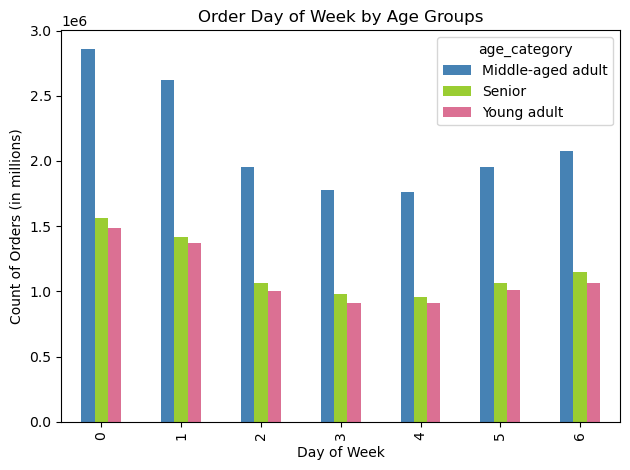

In [68]:
# Graphing crosstab. 

bar_age_orders_dow = crosstab_age_dow.plot(kind = 'bar', color = ['steelblue', 'yellowgreen', 'palevioletred'])
                                                

# Title 
plt.title ('Order Day of Week by Age Groups')
plt.xlabel ('Day of Week')
plt.ylabel ('Count of Orders (in millions)')

# Layout
plt.tight_layout()

- All age categories place the **most orders on Saturday and Sunday (0 and 1).**
- **This suggests that age alone does not play a role in ordering habits.**
- **This also suggests that ads should be run on other days during the week (Tuesday and Wednesday), when less orders are being placed (to improve sales).**

In [69]:
# Exporting bar chart. 

bar_age_orders_dow.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'age_order_dow.png'),bbox_inches='tight')

### Making Sample Data for Line Graphs and for Future Analyses

In [70]:
# Making 70/30 split of data.

np.random.seed(4)
dev = np.random.rand(len(df_2)) <= 0.7

# Store 70% of the sample in the dataframe 'df_big'.

df_big = df_2[dev]

# Store 30% of the sample in the dataframe 'df_small'.

df_small = df_2[~dev]

In [71]:
# Check current df
len(df_2)

30964564

In [72]:
# Check sum of samples equals whole df
len(df_big) + len(df_small)

30964564

In [73]:
# Exporting small sample for future use. 
df_small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_small_sample_data.pkl'))

#### Age and Hour of Orders 

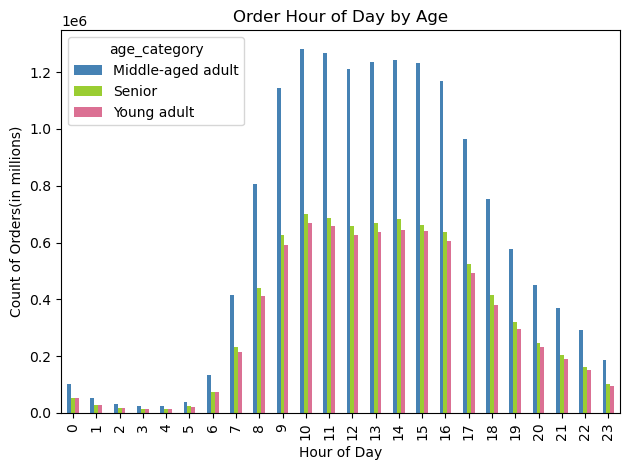

In [75]:
# Age groups and order hour of day 

# Crosstab 
crosstab_order_hour_age = pd.crosstab(df_2['order_hour_of_day'], df_2['age_category'])

# Bar Chart - to try and find peak hours 
bar_age_order_hour = crosstab_order_hour_age.plot(kind = 'bar', color = ['steelblue', 'yellowgreen', 'palevioletred'])

plt.title('Order Hour of Day by Age')
plt.ylabel('Count of Orders(in millions)')
plt.xlabel('Hour of Day')
                                
plt.tight_layout()


- A bar chart was made to find peaks in ordering times.
- The chart shows that each age group follows the same trend, but in varying degrees.
- **Middle-aged adults place the most orders**, followed by seniors, with young adults placing the least amount of orders during any hour.
- All age groups place the most orders around **10am (peak).**
- By **3pm**, orders start to decrease and continue to do so for the remaining hours. 
- The least amount of orders are placed **before 5am.** This could be a good time to run ads to try and boost sales during this time.

In [76]:
# Exporting line graph.

bar_age_order_hour.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_age_order_hour.png'),bbox_inches='tight')

#### Age and Departments

##### Ordering habits based on age groups.

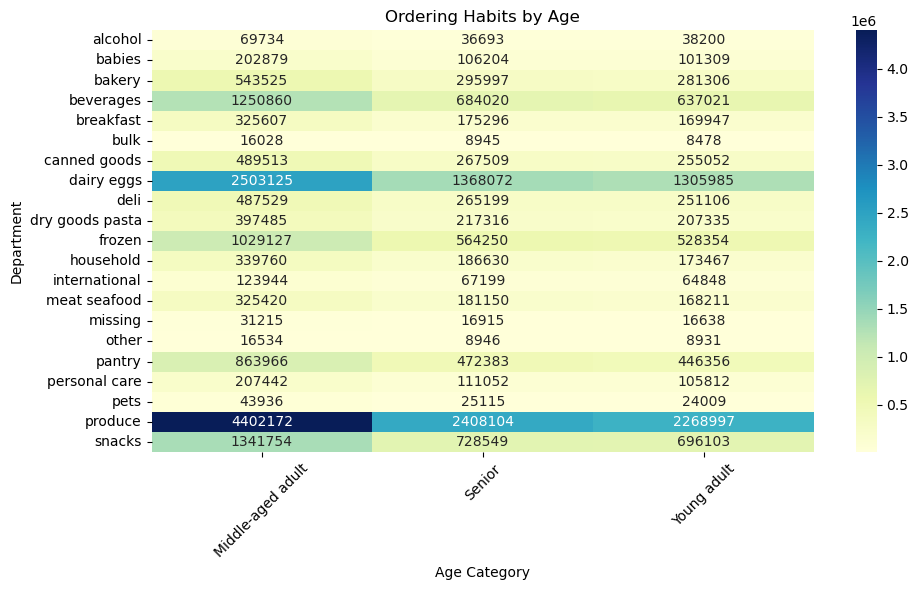

In [77]:
# Creating crosstab.
crosstab_age_department = pd.crosstab(df_2['department'], df_2['age_category'])

# Plotting heatmap.
plt.figure(figsize=(10, 6)) 
sns.heatmap(crosstab_age_department, cmap='YlGnBu', annot=True, fmt='d')

# Labels
plt.title('Ordering Habits by Age')
plt.ylabel('Department')
plt.xlabel('Age Category')

plt.xticks(rotation=45)
plt.yticks(rotation=0)                                      
plt.tight_layout()

# Saving figure
plt.savefig(os.path.join(path, '04 Analysis and Results', 'Visualizations', 'heatmap_age_dept.png'), bbox_inches='tight')

- A heatmap was made to try and find if certain age groups tend to buy different items from different departments.
- **The same departments (produce, dairy/eggs, snacks, frozen, etc.) are popular among all of the age groups.**
- **There doesn't appear to be any specific department that is popular amongst a specific age group.**
- **This suggests that age alone doesn't play a role in ordering behavior.** 
- Age in combination with dependents may play a role in ordering behavior and will be investigated.

### Family Status Profile

In [78]:
# Checking statistics of family variables.

df_2[['income', 'n_dependants', 'age']].agg(['min', 'max', 'mean'])

,income,n_dependants,age
min,25903.000000,0.000000,18.000000
max,593901.000000,3.000000,81.000000
mean,99675.865108,1.501819,49.468026


- Number of dependents range from 0 - 3.
- Min income is around 25,000.
- Max income is around 590,000.
- Mean income is around 99,600.

In [79]:
# Crosstab of age and family status. 

crosstab_age_fam_status = pd.crosstab(df_2['fam_status'], df_2['age_category'], dropna = False)
crosstab_age_fam_status

age_category,Middle-aged adult,Senior,Young adult
fam_status,,,
divorced/widowed,623313,2021958,0
living with parents and siblings,0,0,1481172
married,11233531,6173586,4336594
single,3154711,0,1939699


- Most customers are **middle-aged adults and married.**

In [84]:
# Creating single vs. family customer profiles.

# Define conditions
conditions = [
    (df_2['age'] <= 33) & (df_2['n_dependants'] == 0),
    (df_2['age'] <= 33) & (df_2['n_dependants'] >= 1),
    (df_2['age'] >= 34) & (df_2['age'] <= 65) & (df_2['n_dependants'] == 0),
    (df_2['age'] >= 34) & (df_2['age'] <= 65) & (df_2['n_dependants'] >= 1),
    (df_2['age'] > 65) & (df_2['n_dependants'] == 0),
    (df_2['age'] > 65) & (df_2['n_dependants'] >= 1)
]

# Define corresponding outputs
choices = [
    'Young single',
    'Young family',
    'Older single',
    'Older family',
    'Senior alone',
    'Senior family'
]


In [91]:
# Apply the vectorized logic
df_2['household_status'] = np.select(conditions, choices, default='Other')

C:\Users\TanaT\AppData\Local\Temp\ipykernel_32824\818447571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['household_status'] = np.select(conditions, choices, default='Other')


In [92]:
# Checking dataframe

df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity,age_category,household_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,snacks,Midwest,high,Senior,Senior family
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,snacks,Midwest,high,Senior,Senior family
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,6/16/2018,2,married,158302,both,snacks,Northeast,high,Senior,Senior family
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,1/4/2019,2,married,57797,both,snacks,West,high,Middle-aged adult,Older family
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,5/8/2019,3,living with parents and siblings,34171,both,snacks,South,high,Young adult,Young family


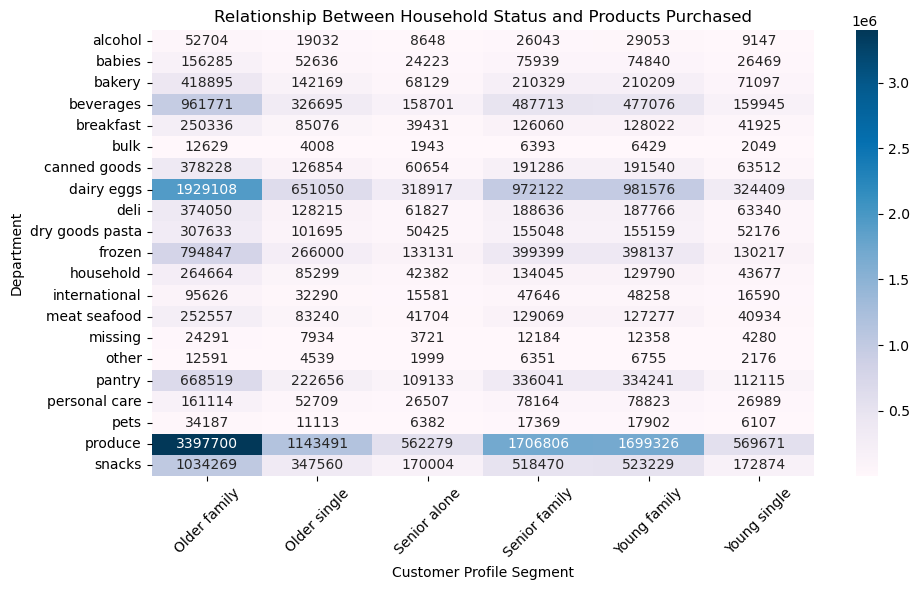

In [94]:
# Crosstab of household status and departments to see if certain items are popular among different customer segments. 


# Making crosstab
crosstab_fam_department = pd.crosstab(df_2['department'], df_2['household_status'])


# Plotting heatmap
plt.figure(figsize=(10, 6))
                             
sns.heatmap(crosstab_fam_department, cmap='PuBu', annot=True,fmt='d')
                                    
                                      
# Labels
plt.title('Relationship Between Household Status and Products Purchased')
plt.ylabel('Department')
plt.xlabel('Customer Profile Segment')
plt.xticks(rotation=45)
plt.yticks(rotation=0)                                      
plt.tight_layout()

# Saving figure
plt.savefig(os.path.join(path, '04 Analysis and Results', 'Visualizations', 'heatmap_household_dept.png'), bbox_inches='tight')

- Since age alone was found to not be factor in ordering behavior, this heatmap takes into account **age and number of dependents** by profiling customers by household status.
- This heatmap shows that senior and young singles have similar ordering habits.
- Families also have similar ordering habits, like purchasing mostly **produce, dairy/egges, etc.**
- Seems like **older families** in general buy more items, in particular they buy more **snack and beverage items** compared to other household statuses. 

#### Age and Number of Dependents

- Found **age and number of dependents are not related** (line graph exercise 4.9).
- Due to memory usage, will not remake graph here, will be provided in report.

### Income Profile

In [98]:
df_2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [99]:
# Creating income profiles. 

df_2.loc[df_2['income'] <30000, 'income_category'] = 'Low Income'
df_2.loc[(df_2['income'] >30000) & (df_2['income'] <= 99000), 'income_category'] = 'Average Income'
df_2.loc[df_2['income'] > 99000, 'income_category'] = 'High Income'

In [100]:
# Checking dataframe with new income category column. 

df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,fam_status,income,merge_status,department,region,customer_activity,age_category,household_status,income_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,snacks,Midwest,high,Senior,Senior family,Average Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,snacks,Midwest,high,Senior,Senior family,Average Income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,snacks,Northeast,high,Senior,Senior family,High Income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,both,snacks,West,high,Middle-aged adult,Older family,Average Income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,both,snacks,South,high,Young adult,Young family,Average Income


#### Age and Income

- Found **age and income are not related** (scatterplot exercise 4.9).
- Due to memory usage, will not remake graph here, will be provided in report. 

#### Customer Distribution by Income Groups

In [101]:
# Checking distribution of income categories among customers.

df_2['income_category'].value_counts()

income_category
Average Income    16159464
High Income       14611230
Low Income          193870
Name: count, dtype: int64

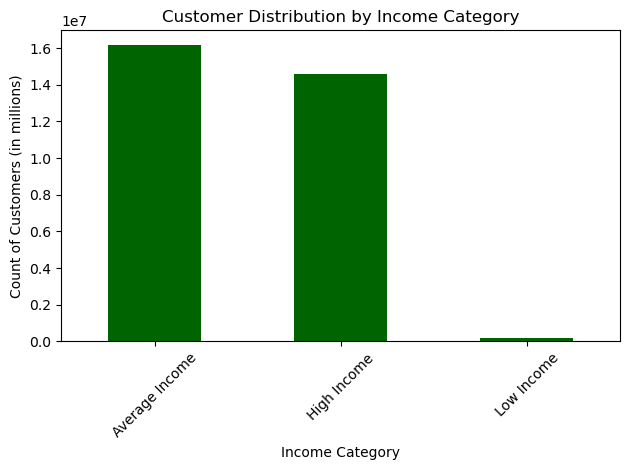

In [103]:
# Bar chart of distribution of customers by income. 

bar_income_dist = df_2['income_category'].value_counts().plot.bar(color = 'darkgreen')


plt.title('Customer Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count of Customers (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

- The bar chart shows most of the customer base is comprised of individuals who make an **average income** (between 30,000 - 99,000 dollars), followed by customers who make over 99,000 dollars (high income).
- Few customers make less than 30,000 dollars (low income). 

In [104]:
# Exporting chart

bar_income_dist.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_cust_income_dist.png'),bbox_inches='tight')

In [150]:
# Step 7 
# Aggregating income profile for expenditure (prices).  

df_2.groupby('income_category').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
Average Income   7.658475  1.0  25.0
High Income      7.953446  1.0  25.0
Low Income       6.532603  1.0  25.0

- Regardless of income, customers seem to spend similar amounts.
- **Low income earners spend the least on average, while high income earners spend slightly more than other income categories.**

In [155]:
# Step 7
# Aggregating income profile for usage frequency 

df_2.groupby('income_category').agg({'median_days_between_orders': ['mean', 'min', 'max']})

median_days_between_orders           
                                      mean  min   max
income_category                                      
Average Income                   10.017731  0.0  30.0
High Income                       9.876882  0.0  30.0
Low Income                       10.955434  0.0  30.0

- Regardless of income, order frequency is about the same.
- Customers go about 10 days between orders.
- **Income alone does not appear to be directly related to usage frequency.**

#### Step 7 - Aggregating the max, mean, and min variables for age profile. 

In [105]:
# Aggregating expenditure. 
# Expenditure (price) 

df_2.groupby('income_category').agg({'prices': ['min', 'max', 'mean']})

prices                
                   min   max      mean
income_category                       
Average Income     1.0  25.0  7.658475
High Income        1.0  25.0  7.953446
Low Income         1.0  25.0  6.532603

- The **average expenditure (price) is roughly the same, regardless of how much money customers make.**
- Average and high income earners spend the same on average (around 7-8 dollars) per item, while low income earners spend slightly less (around 6 dollars).

In [106]:
# Aggregating usage frequency.
# Finding the usage frequency by using 'median_days_between_orders' column to see how many days pass between orders. 

df_2.groupby('income_category').agg({'median_days_between_orders': ['min', 'max', 'mean']})

median_days_between_orders                 
                                       min   max       mean
income_category                                            
Average Income                         0.0  30.0  10.017731
High Income                            0.0  30.0   9.876882
Low Income                             0.0  30.0  10.955434

- Regardless of income category, all customers seem to go about **10 days between orders.**
- **Income does not appear to directly affect the frequency of orders.**

### Loyalty Status Profile

#### Customer Distribution by Loyalty Status

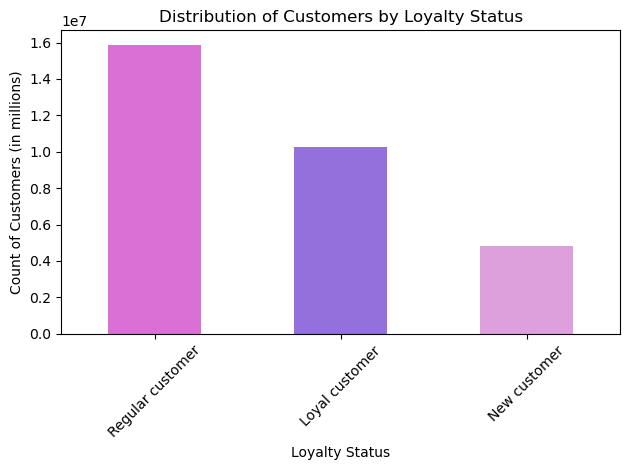

In [110]:
# Checking customer distribution based on loyalty status. 

bar_loyalty_status = df_2['loyalty_flag'].value_counts(dropna = False).plot.bar(color = ['orchid', 'mediumpurple', 'plum'])

plt.title('Distribution of Customers by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Customers (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

- **Most customers are regulars**, meaning they have placed between 11-40 orders.
- This is followed by loyal customers who have placed over 40 orders, with new customers accounting for the smallest portion of the customer base and placing 10 or less orders. 

In [111]:
# Export chart

bar_loyalty_status.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_loyalty_dist.png'),bbox_inches='tight')

#### Ordering Habits Based on Loyalty Status

In [112]:
# Checking ordering habits of customers based on loyalty status. 

df_2.groupby('loyalty_flag').agg({'order_number' : ['mean', 'min', 'max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      32.641196   1  99
New customer         4.268295   1  10
Regular customer    12.347452   1  40

In [113]:
# Creating variable to plot. 

mean_order_loyalty = df_2.groupby('loyalty_flag')['order_number'].mean()
mean_order_loyalty

loyalty_flag
Loyal customer      32.641196
New customer         4.268295
Regular customer    12.347452
Name: order_number, dtype: float64

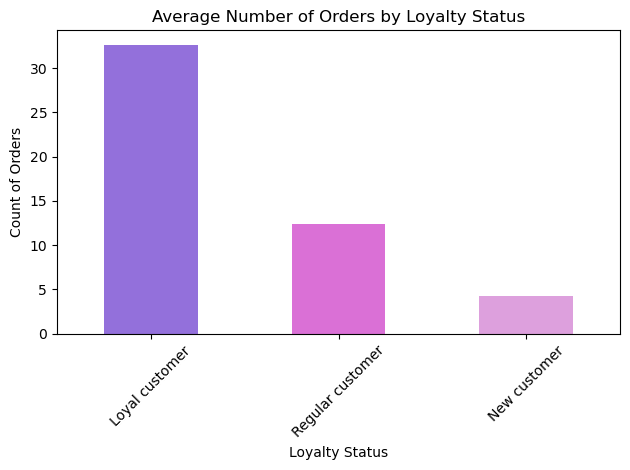

In [134]:
# Sorting values from highest to lowest
mean_order_loyalty_sorted = mean_order_loyalty.sort_values(ascending=False)

# Plotting bar chart - ordering habits by loyalty status - average number of orders 
bar_avg_order_loyalty = mean_order_loyalty_sorted.plot.bar(color=['mediumpurple', 'orchid', 'plum'])

# Labels
plt.title('Average Number of Orders by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

- The bar chart confirms each loyalty status category.
- **Loyal customers make the most orders on average (over 30)** with new customers making the least number of orders on average (4).
- Regular customers are in the middle, placing an average of about 12 orders. 

In [135]:
# Exporting bar chart

bar_avg_order_loyalty.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_loyalty_avg_order.png'),bbox_inches='tight')

#### Loyalty Status and Order Frequency

In [127]:
# Finding median days between orders by loyalty status.

df_2.groupby('loyalty_flag').agg({'median_days_between_orders': ['min', 'max', 'mean']})

median_days_between_orders                 
                                        min   max       mean
loyalty_flag                                                
Loyal customer                          0.0  14.0   5.170559
New customer                            0.0  30.0  18.037059
Regular customer                        0.0  30.0  10.612951

- **Loyal customers** return to using Instacart more often than other loyalty groups, with an average of 5 days between placing orders and going 14 days at most between orders.
- Regular and new customers both have a max of 30 days between orders.
- However, **regular customers** return more frequently (avg. of 10 days between orders) than new customers with an average of 18 days between placing orders.  

### Region Profile

#### Ordering Habits by Region

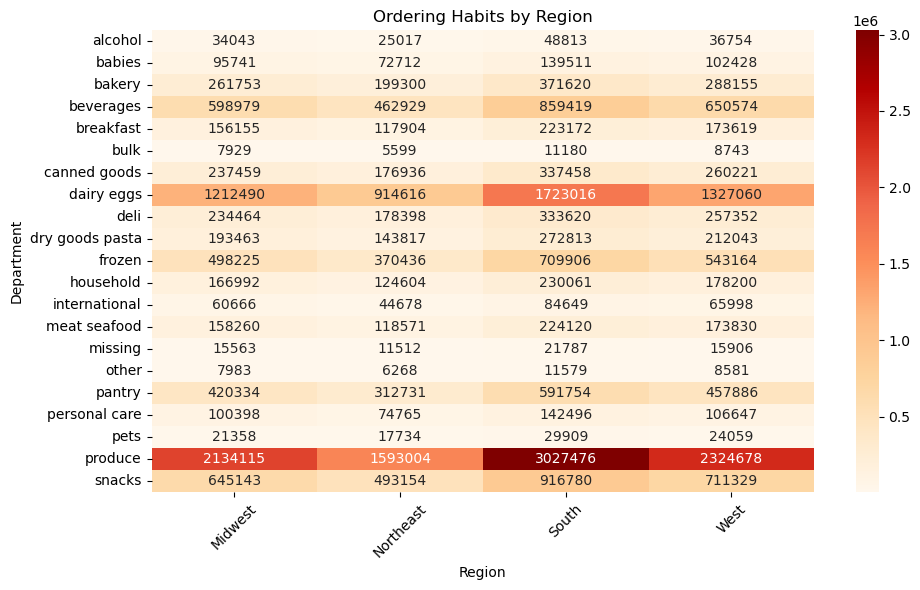

In [117]:
# Department and region - are products popular in specific regions? 

# Crosstab 
crosstab_region_dept = pd.crosstab(df_2['department'], df_2['region'])

# Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_region_dept, annot=True, fmt='d', cmap='OrRd')
plt.title('Ordering Habits by Region')
plt.xlabel('Region')
plt.ylabel('Department')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()

# Saving figure
plt.savefig(os.path.join(path, '04 Analysis and Results', 'Visualizations', 'heatmap_region_orders.png'), bbox_inches='tight')


- **Department popularity is similar across all regions.** **Produce** being one of the most popular departments along with **dairy/eggs, pantry, etc.**
- The **South** buys the most overall (especially produce), followed by the West and Midwest.
- It seems like **frozen** items are slightly more popular in the South and the least popular in the Northeast. 

#### Household Status (age and dependents) by Region

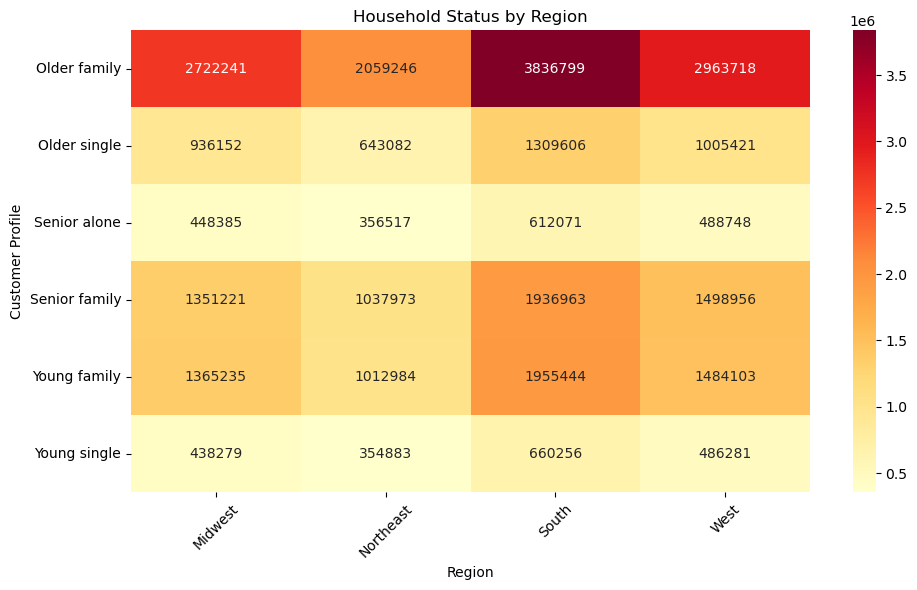

In [118]:
# Crosstab of region and household status

crosstab_region_house = pd.crosstab(df_2['household_status'], df_2['region'])

# Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_region_house, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Household Status by Region')
plt.xlabel('Region')
plt.ylabel('Customer Profile')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()

# Saving figure
plt.savefig(os.path.join(path, '04 Analysis and Results', 'Visualizations', 'heatmap_region_household.png'), bbox_inches='tight')

- Step 8 - comparing customer profile across regions
- This is a heatmap showing how household status (age and number of dependent variables) differ across the regions.
- **Older families** (over 33 with at least 1 dependent) account for most of the customer base in each region. 
- The **South** has the highest number of customers for every household status category. In particular, it has the highest number of older family customers.
- The **West** and **Midwest** have similar numbers of customers for each household category.
- The **Northeast** seems to have less customers overall. In particular, it contains the lowest number of senior and young single customers (those with no dependents).

#### Regions and Income Status

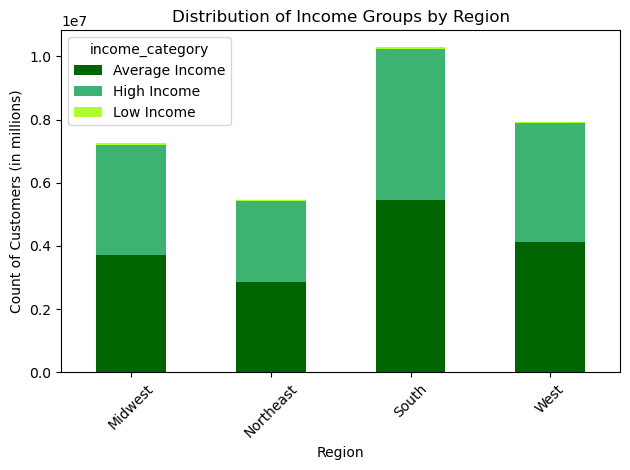

In [121]:
# Crosstab
crosstab_region_income = pd.crosstab(df_2['region'], df_2['income_category'])

# Region_income bar chart

bar_region_income = crosstab_region_income.plot(kind='bar', stacked =True, color = ['darkgreen', 'mediumseagreen', 'greenyellow'])

plt.title('Distribution of Income Groups by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers (in millions)')

plt.xticks(rotation=45)          
plt.tight_layout()
        

- The bar chart suggests that the **distribution of customers by income category is similar across all 4 regions of the U.S.**
- The customer base for each region is mostly comprised of customers that earn an **average to high salary**, while lower income earners account for the least amount of customers.
- The **Northeast** has the least amount of customers in general and could be a potential target to promote app usage to gain more customers.

In [122]:
# Export 
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_region_income.png'),bbox_inches='tight')

### Key Question 1 - To schedule ads at times when there are fewer orders.

#### Busiest Days of the Week

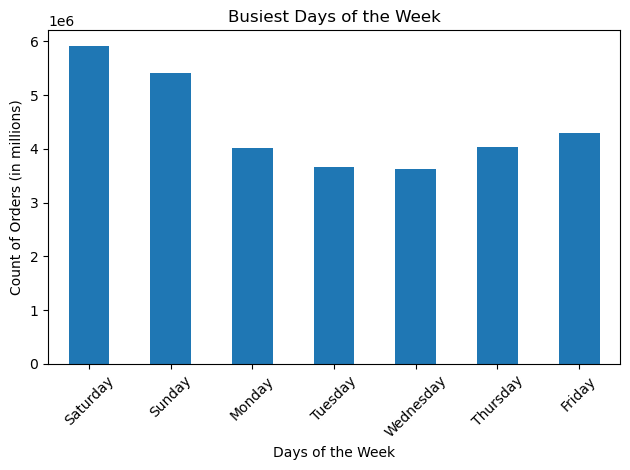

In [136]:
# Bar chart

# Charting the frequency of the 'orders_day_of_week' column - the number of orders for each day of the week.
# Ordered from largest to smallest.


bar_orders_dow = df_2['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Days are in order 0-6 - changed to day labels in that order
plt.title('Busiest Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Count of Orders (in millions)')
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)        
plt.tight_layout()
        

- The **busiest days of the week are Saturday and Sunday based on the count of orders.**
- Midweek **(Tuesday and Wednesday)** have the least number of orders. More ads could be placed during this time to boost sales. 

In [137]:
# Export 
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_busiest_days.png'),bbox_inches='tight')

#### Busiest Hours of the Day

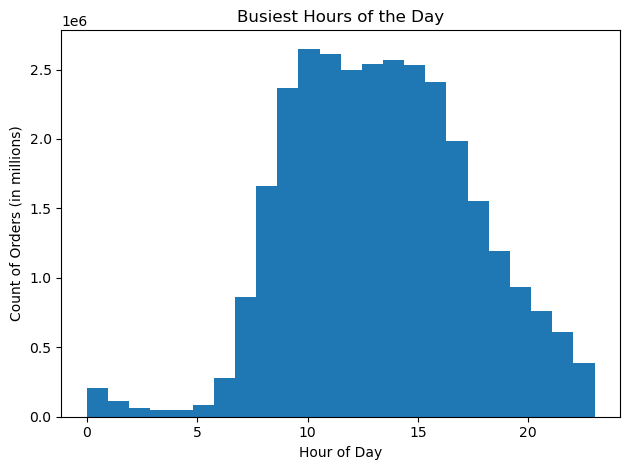

In [138]:
# Plotting the frequency of orders during the hours of the day.

hist_busiest_hours = df_2['order_hour_of_day'].plot.hist(bins = 24)


plt.title('Busiest Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders (in millions)')
     
plt.tight_layout()


- Very few orders are placed during **early morning hours (before 5am)**, but after 5am orders begin to rise and hit their peak.
- It seems like most orders are placed around **10/11am - 3pm.**
- After around 3pm, orders begin to drop and continue to do so for the rest of the day.

In [139]:
# Export

hist_busiest_hours.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'hist_busiest_hours.png'),bbox_inches='tight')

### Key Question 2 - Particular times of the day when people spend the most money.

- To inform the types of products that should be advertised at times. 

#### Tracking expenditure (prices) throughout the hours of the day.

In [140]:
# Making a new dataframe that only contains the 'prices' and 'order_hour_of_day' columns (to chart from the small SAMPLING DATA).

df_price_sample =  df_small[['order_hour_of_day', 'prices']]
df_price_sample.head()

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
5,7,5.8
8,20,5.8
12,13,5.8


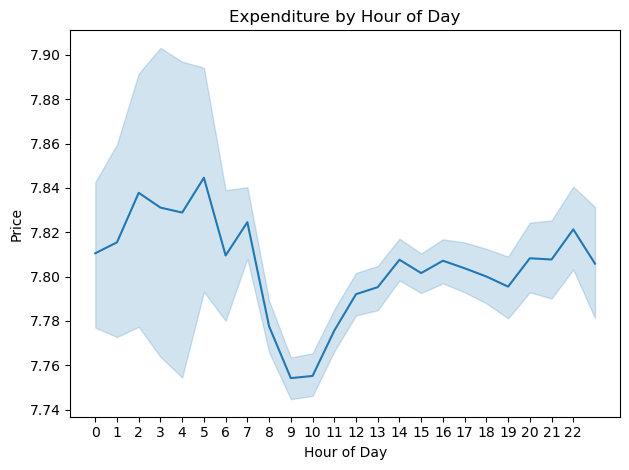

In [146]:
# Creating the line chart based on the small sampling data and specific columns.
# Charting expenditure (prices) throughout the hours of the day.


line_price_hours = sns.lineplot(data = df_price_sample, x = 'order_hour_of_day', y = 'prices')

plt.title('Expenditure by Hour of Day')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 23))  #each hour 
plt.ylabel('Price')

plt.tight_layout()


- **Expenditure is the highest around 2, 5, and 7am.**
- Previously found that number of orders peak around **10am, yet expenditure at this time is the lowest.**
- **This could mean that though many orders are made during this time, expenditure is low due to customers buying cheaper products.**

In [147]:
# Export
line_price_hours.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'line_price_hours.png'),bbox_inches='tight')

#### Expenditure (prices) throughout the days of the week.

In [143]:
# Making small subset.

df_price_dow_small =  df_small[['orders_day_of_week', 'prices']]
df_price_dow_small.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
5,1,5.8
8,1,5.8
12,4,5.8


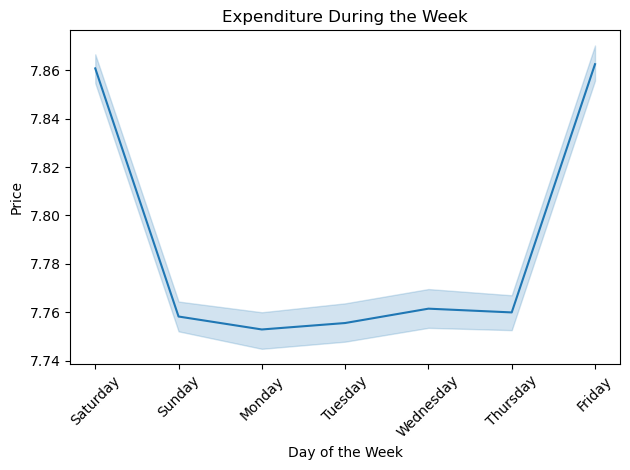

In [144]:
# Creating the line chart based on the small subset and specific columns. 
# Saving the line chart as an object called line.

line_price_dow = sns.lineplot(data = df_price_dow_small, x = 'orders_day_of_week', y = 'prices')

plt.title('Expenditure During the Week')
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45) 
plt.ylabel('Price')

plt.tight_layout()


- **Expenditure peaks on Saturday and Friday**, possibly due to people stocking up on groceries for the weekend and before the start of the work week.
- This partly aligns with the bar chart showing the busiest days of the week being Saturday and Sunday in terms of count of orders.
- **This suggests that customers are not only ordering more on Saturday, but also spending more on products.**
- However, **expenditure drops on Sunday**, which is the other busiest day of the week for orders.
- **This suggests that customers are placing more orders on Sunday, but buying less expensive and/or less items per order.** 
- The translucent blue bands around the line are error bands and represent the chart's confidence intervals.
- This means that if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the bands. 

In [145]:
# Export
line_price_dow.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'line_price_dow.png'),bbox_inches='tight')

### Alternative Versions of Visualizations (Step 9)

Text(0, 0.5, '')

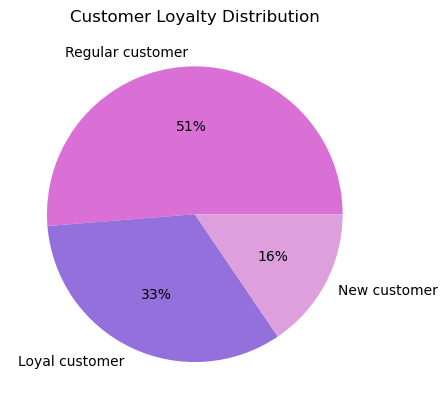

In [165]:
# Pie chart of distribution of customers by loyalty status.

pie_1 =  df_2['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'), title='Customer Loyalty Distribution', colors=['orchid','mediumpurple', 'plum'])

 # No y-label
plt.ylabel('')  

In [166]:
# Exporting 
pie_1.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'pie_cust_loyalty.png'),bbox_inches='tight')

Text(0, 0.5, '')

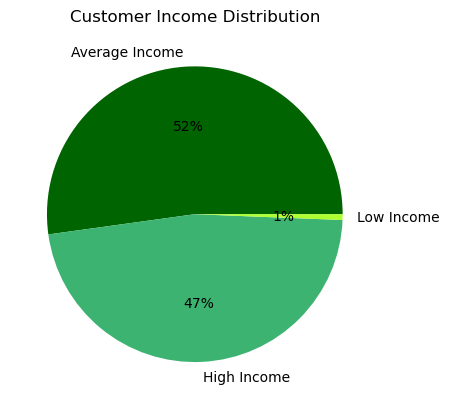

In [169]:
# Pie customer distribution by income. 
pie_2 = df_2['income_category'].value_counts().plot.pie(autopct=('%1.f%%'), title='Customer Income Distribution', colors=['darkgreen', 'mediumseagreen', 'greenyellow'])
plt.ylabel('')  

In [170]:
# Exporting 
pie_2.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'pie_cust_income.png'),bbox_inches='tight')

Text(0, 0.5, '')

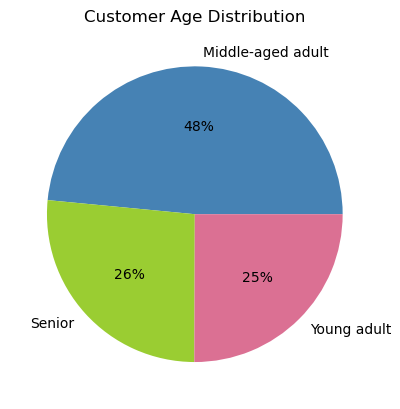

In [172]:
# Pie customer age distribution.
pie_3 = df_2['age_category'].value_counts().plot.pie(autopct=('%1.f%%'), title='Customer Age Distribution', colors=['steelblue', 'yellowgreen', 'palevioletred'])
plt.ylabel('')  

In [173]:
# Export 
pie_3.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'pie_cust_age.png'),bbox_inches='tight')

Text(0, 0.5, '')

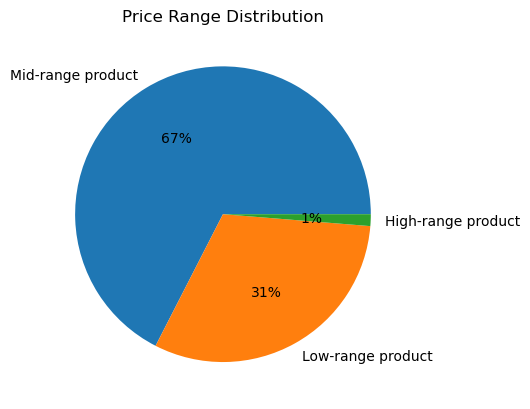

In [174]:
# Pie price range groupings 
pie_4 = df_2['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'), title='Price Range Distribution')
plt.ylabel('')  

In [175]:
# Export
pie_4.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'pie_price_groups.png'),bbox_inches='tight')

Text(0, 0.5, '')

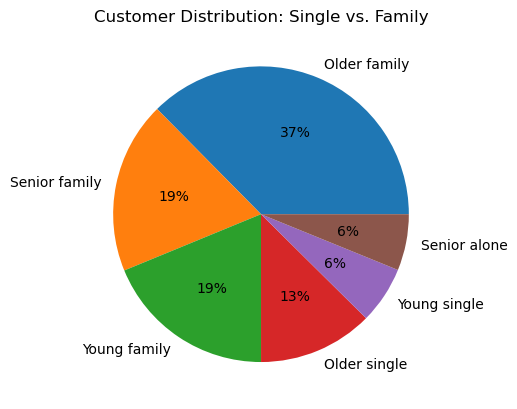

In [176]:
# Bar customer distribution by household status. 
pie_5 = df_2['household_status'].value_counts().plot.bar()
plt.title('Customer Distribution: Single vs. Family')
plt.xlabel('Household Status')
plt.ylabel('Count (millions)')
 
plt.tight_layout()


In [182]:
pie_5.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'pie_fam_single.png'),bbox_inches='tight')

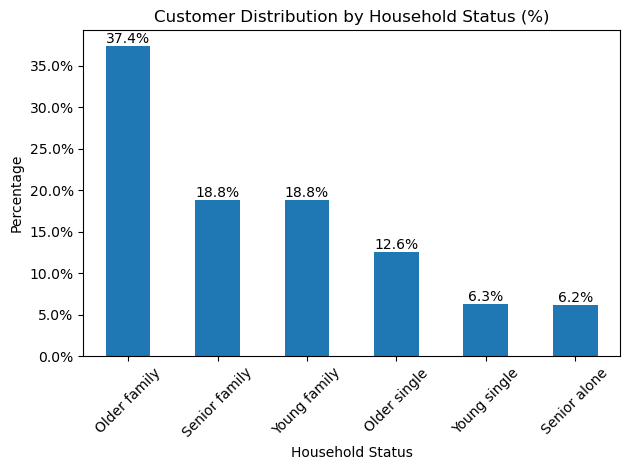

In [179]:
# Importing to show percentages on bar chart.
import matplotlib.ticker as mtick

# Bar chart percentages of household status.
percentages_household = df_2['household_status'].value_counts(normalize=True) * 100
ax = percentages_household.plot.bar()

plt.title('Customer Distribution by Household Status (%)')
plt.xlabel('Household Status')
plt.xticks(rotation=45) 
plt.ylabel('Percentage')

# Y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Percentage labels 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()

In [181]:
# Export 
ax.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'fam_vs_single_dist.png'),bbox_inches='tight')

In [183]:
# Max order number by household status.

fam_status_orders = df_2.groupby('household_status')['order_number'].max()

In [184]:
fam_status_orders

household_status
Older family     99
Older single     99
Senior alone     99
Senior family    99
Young family     99
Young single     99
Name: order_number, dtype: int64

In [185]:
# Average orders by household status.
fam_status_avg_orders = df_2.groupby('household_status')['order_number'].mean()
fam_status_avg_orders

household_status
Older family     17.815525
Older single     18.141781
Senior alone     17.823513
Senior family    17.779937
Young family     17.760804
Young single     17.720852
Name: order_number, dtype: float64

In [148]:
# Checking final dataframe shape 
df_2.shape

(30964564, 38)

In [149]:
# Checking final dataframe output
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,fam_status,income,merge_status,department,region,customer_activity,age_category,household_status,income_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,snacks,Midwest,high,Senior,Senior family,Average Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,snacks,Midwest,high,Senior,Senior family,Average Income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,snacks,Northeast,high,Senior,Senior family,High Income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,both,snacks,West,high,Middle-aged adult,Older family,Average Income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,both,snacks,South,high,Young adult,Young family,Average Income


In [188]:
# Step 10 - Exporting final dataframe used for analyses.

df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'data_final_analysis.pkl'))